# Summarize the results of several rounds of active learning vs random sampling with K562 data
Required inputs: `ModelFitting/K562/ManyRounds/init_10000_inc_3000/performance_summary.txt` and `ModelFitting/K562/ManyRounds/init_4000_inc_2000/performance_summary.txt`

Outputs: TODO

In [1]:
import os
import sys

import numpy as np
import scipy.io
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from src.mpra_tools import loaders, plot_utils

from IPython.display import display

modeling_dir = os.path.join("ModelFitting", "K562", "ManyRounds")
figures_dir = "Figures"
plot_utils.set_manuscript_params()

/ref/bclab/software/ryan/.conda/envs/active-learning/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Read in model performance metrics.

In [2]:
def get_n_train(row, expt):
    if row["Mode"] == "Full":
        filename = os.path.join(modeling_dir, expt, str(row["Fold"]), row["Mode"], "train.mat")
    else:
        filename = os.path.join(modeling_dir, expt, str(row["Fold"]), row["Mode"], row["Round"], "train.mat")
    train_mat = scipy.io.loadmat(filename)
    labels = train_mat["activity_bin"].flatten()
    result = pd.Series({
        "n_train": len(labels),
        "n_positive": (labels == 1).sum()
    })
    result["frac_positive_in_train"] = result["n_positive"] / result["n_train"]
    return result

def get_frac_pos_sampled(group):
    return group["n_positive"] / group.loc[group["Mode"] == "Full", "n_positive"].squeeze()

performance_dict = {}
expts = ["init_10000_inc_3000", "init_4000_inc_2000"]
for expt in expts:
    df = loaders.load_data(
        os.path.join(modeling_dir, expt, "performance_summary.txt"),
        index_col=None,
    )
    df = df.rename(columns={
        "roc_auc": "AUROC",
        "pr_auc": "AUPR",
    })
    data_info = df.apply(get_n_train, axis=1, args=(expt,))
    df = df.join(data_info)
    df["frac_positive_sampled"] = df.groupby("Fold").apply(get_frac_pos_sampled).droplevel(level="Fold")
    performance_dict[expt] = df

Mode    Round     AUROC                AUPR            n_train  \
                          mean       std      mean       std     mean   
0   Entropy   round1  0.818180  0.012692  0.692453  0.035537  10000.0   
15   Random   round1  0.818180  0.012692  0.692453  0.035537  10000.0   
6   Entropy   round2  0.832514  0.011626  0.718441  0.028537  13000.0   
21   Random   round2  0.835943  0.009468  0.724030  0.028638  13000.0   
22   Random   round3  0.848373  0.009806  0.744334  0.029375  16000.0   
7   Entropy   round3  0.849658  0.010917  0.744485  0.031738  16000.0   
23   Random   round4  0.856498  0.012672  0.756459  0.033923  19000.0   
8   Entropy   round4  0.828647  0.092253  0.714267  0.148421  19000.0   
24   Random   round5  0.864154  0.007370  0.768718  0.022895  22000.0   
9   Entropy   round5  0.838678  0.095505  0.732723  0.146276  22000.0   
25   Random   round6  0.870538  0.007876  0.779058  0.022371  25000.0   
10  Entropy   round6  0.813028  0.121586  0.692945  0.182447  25000.0   
26   Random   round7  0.874397  0.007730  0.783839  0.024882  28000.0   
11  Entropy   round7  0.877959  0.011167  0.790812  0.028749  28000.0   
12  Entropy   round8  0.885376  0.006687  0.803143  0.022791  31000.0   
27   Random   round8  0.879721  0.008476  0.792363  0.024106  31000.0   
28   Random   round9  0.883414  0.006410  0.799235  0.018831  34000.0   
13  Entropy   round9  0.889557  0.006631  0.808704  0.020756  34000.0   
1   Entropy  round10  0.892827  0.007113  0.813829  0.022172  37000.0   
16   Random  round10  0.887454  0.006690  0.806056  0.021250  37000.0   
17   Random  round11  0.890131  0.006944  0.809167  0.020968  40000.0   
2   Entropy  round11  0.894914  0.006948  0.816381  0.022050  40000.0   
18   Random  round12  0.891784  0.006749  0.812859  0.019550  43000.0   
3   Entropy  round12  0.894832  0.006386  0.816645  0.019919  43000.0   
19   Random  round13  0.893289  0.007558  0.813812  0.023078  46000.0   
4   Entropy  round13  0.894907  0.008538  0.817072  0.021641  46000.0   
20   Random  round14  0.895556  0.007401  0.817689  0.023745  47274.4   
5   Entropy  round14  0.895556  0.007401  0.817689  0.023745  47274.4   
14     Full     full  0.895556  0.007401  0.817689  0.023745  47274.4   

               n_positive             frac_positive_in_train            \
           std       mean         std                   mean       std   
0     0.000000     2880.2   60.228823               0.288020  0.006023   
15    0.000000     2880.2   60.228823               0.288020  0.006023   
6     0.000000     4179.4  184.410894               0.321492  0.014185   
21    0.000000     3741.8   79.219526               0.287831  0.006094   
22    0.000000     4602.6   86.618192               0.287663  0.005414   
7     0.000000     5388.3  414.458697               0.336769  0.025904   
23    0.000000     5456.7  103.987232               0.287195  0.005473   
8     0.000000     6388.6  697.058773               0.336242  0.036687   
24    0.000000     6317.3  117.535857               0.287150  0.005343   
9     0.000000     7408.7  704.482797               0.336759  0.032022   
25    0.000000     7183.0  139.529368               0.287320  0.005581   
10    0.000000     8458.3  690.337124               0.338332  0.027613   
26    0.000000     8017.8  148.487785               0.286350  0.005303   
11    0.000000     9419.2  686.508849               0.336400  0.024518   
12    0.000000    10171.4  567.373520               0.328110  0.018302   
27    0.000000     8869.5  160.191032               0.286113  0.005167   
28    0.000000     9713.6  164.094959               0.285694  0.004826   
13    0.000000    10969.4  401.609318               0.322629  0.011812   
1     0.000000    11530.3  223.118329               0.311630  0.006030   
16    0.000000    10557.7  179.106455               0.285343  0.004841   
17    0.000000    11423.3  191.145698               0.285582  0.004779   
2     0.000000    12010.5  233.902283    

Mode    Round     AUROC                AUPR            n_train  \
                          mean       std      mean       std     mean   
0   Entropy   round1  0.607349  0.082208  0.360280  0.106649   4000.0   
24   Random   round1  0.607349  0.082208  0.360280  0.106649   4000.0   
11  Entropy   round2  0.751011  0.072391  0.562989  0.102551   6000.0   
35   Random   round2  0.734637  0.072556  0.508147  0.109664   6000.0   
40   Random   round3  0.696811  0.098799  0.454964  0.124715   8000.0   
16  Entropy   round3  0.791075  0.012570  0.639630  0.061464   8000.0   
17  Entropy   round4  0.801295  0.017320  0.658504  0.038997  10000.0   
41   Random   round4  0.724926  0.060389  0.458783  0.090679  10000.0   
42   Random   round5  0.771923  0.074249  0.571432  0.119884  12000.0   
18  Entropy   round5  0.808689  0.015066  0.660321  0.055366  12000.0   
43   Random   round6  0.784658  0.037743  0.556221  0.075897  14000.0   
19  Entropy   round6  0.817682  0.025080  0.682271  0.081054  14000.0   
44   Random   round7  0.813147  0.026865  0.637022  0.096055  16000.0   
20  Entropy   round7  0.819427  0.023545  0.679116  0.064703  16000.0   
21  Entropy   round8  0.810785  0.034767  0.662223  0.085232  18000.0   
45   Random   round8  0.799025  0.066430  0.620397  0.113105  18000.0   
22  Entropy   round9  0.840185  0.008781  0.726469  0.045156  20000.0   
46   Random   round9  0.818706  0.021615  0.650075  0.075893  20000.0   
1   Entropy  round10  0.843760  0.014879  0.723512  0.049724  22000.0   
25   Random  round10  0.839983  0.020217  0.709592  0.058935  22000.0   
2   Entropy  round11  0.844047  0.021200  0.731557  0.055287  24000.0   
26   Random  round11  0.844123  0.016124  0.708666  0.056873  24000.0   
3   Entropy  round12  0.838876  0.018603  0.722446  0.035737  26000.0   
27   Random  round12  0.850861  0.016126  0.733666  0.061500  26000.0   
4   Entropy  round13  0.830397  0.026867  0.679576  0.088138  28000.0   
28   Random  round13  0.840382  0.019362  0.712696  0.068100  28000.0   
5   Entropy  round14  0.862656  0.014235  0.760514  0.034631  30000.0   
29   Random  round14  0.851125  0.018547  0.725901  0.058836  30000.0   
30   Random  round15  0.855758  0.018662  0.746981  0.033667  32000.0   
6   Entropy  round15  0.853565  0.020646  0.736733  0.057999  32000.0   
31   Random  round16  0.858045  0.021257  0.758950  0.037691  34000.0   
7   Entropy  round16  0.856546  0.019944  0.738329  0.049340  34000.0   
8   Entropy  round17  0.840414  0.051824  0.720832  0.102430  36000.0   
32   Random  round17  0.864072  0.012789  0.766862  0.033886  36000.0   
9   Entropy  round18  0.857864  0.026402  0.746541  0.056345  38000.0   
33   Random  round18  0.861156  0.015207  0.758109  0.036705  38000.0   
10  Entropy  round19  0.862374  0.019715  0.761665  0.040171  40000.0   
34   Random  round19  0.861718  0.014527  0.750534  0.048973  40000.0   
36   Random  round20  0.859182  0.018326  0.751793  0.047360  42000.0   
12  Entropy  round20  0.852305  0.013715  0.750159  0.024893  42000.0   
37   Random  round21  0.861966  0.012957  0.763601  0.026245  44000.0   
13  Entropy  round21  0.863931  0.014728  0.762414  0.034367  44000.0   
14  Entropy  round22  0.854380  0.026779  0.742682  0.059978  46000.0   
38   Random  round22  0.860083  0.022169  0.760218  0.039313  46000.0   
15  Entropy  round23  0.862177  0.017081  0.758480  0.043383  47274.4   
39   Random  round23  0.862177  0.017081  0.758480  0.043383  47274.4   
23     Full     full  0.862177  0.017081  0.758480  0.043383  47274.4   

               n_positive             frac_positive_in_train            \
           std       mean         std                   mean       std   
0     0.000000     1155.6   34.124608               0.288900  0.008531   
24    0.000000     1155.6   34.124608               0.288900  0.008531   
11    0.000000     2128.8  141.105792               0.354800  0.023518   
35    0.000000     1725.0   41.387062               0.28750

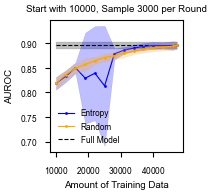

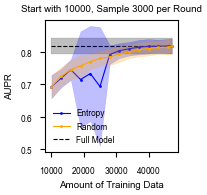

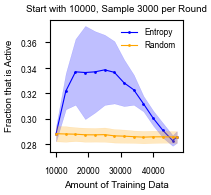

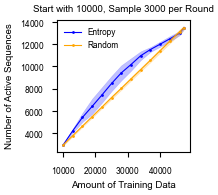

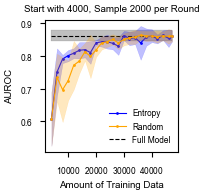

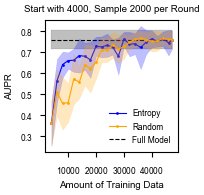

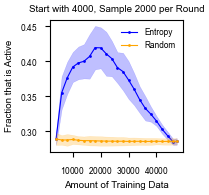

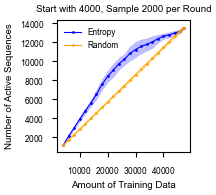

In [16]:
for expt, df in performance_dict.items():
    summary_df = df.groupby(["Mode", "Round"])[
        ["AUROC", "AUPR", "n_train", "n_positive", "frac_positive_in_train", "frac_positive_sampled"]
    ].agg(["mean", "std"])
    summary_df = summary_df.reset_index()
    display(summary_df.sort_values(by=("n_train", "mean")))

    # Pull out the full model since this will be plotted differently
    full_model = summary_df[summary_df["Mode"] == "Full"].squeeze()
    summary_df = summary_df[summary_df["Mode"] != "Full"]
    summary_df = summary_df.sort_values(by=("n_train", "mean"))

    expt_splitter = expt.split("_")
    title = "Start with " + expt_splitter[1] + ", Sample " + expt_splitter[3] + " per Round"

    colors = {
        "Entropy": "blue",
        "Random": "orange"
    }

    for metric in ["AUROC", "AUPR", "frac_positive_in_train", "n_positive"]:
        alpha = 0.25
        fig, ax = plt.subplots(figsize=plot_utils.get_figsize(frac=0.25, aspect=1))
        for mode, data in summary_df.groupby("Mode"):
            x = data["n_train", "mean"]
            y = data[metric]
            c = colors[mode]

            ax.plot(
                x,
                y["mean"],
                label=mode,
                marker="o",
                zorder=2,
                color=c
            )
            ax.fill_between(
                x,
                y["mean"] - y["std"],
                y["mean"] + y["std"],
                alpha=alpha,
                zorder=2,
                color=c
            )

        if metric == "AUROC" or metric == "AUPR":
            # I like having a bit of whitespace on the xaxis, so show the full model 
            # with plot instead of axhline
            n = len(x)
            ax.plot(
                x,
                [full_model[metric, "mean"]] * n,
                color="k",
                label="Full Model",
                linestyle="--",
                zorder=1
            )
            ax.fill_between(
                x,
                [full_model[metric, "mean"] - full_model[metric, "std"]] * n,
                [full_model[metric, "mean"] + full_model[metric, "std"]] * n,
                color="k",
                alpha=alpha,
                zorder=1
            )

        elif metric == "n_positive":
            metric = "Number of Active Sequences"
        elif metric == "frac_positive_in_train":
            metric = "Fraction that is Active"

        ax.set_xlabel("Amount of Training Data")
        ax.set_ylabel(metric)
        ax.set_title(title)
        ax.legend(
            frameon=False
        )
        plot_utils.save_fig(fig, os.path.join(figures_dir, f"k562_manyRounds_{expt}_{metric}"))

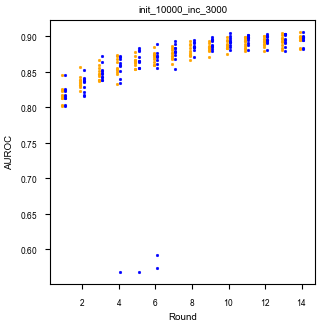

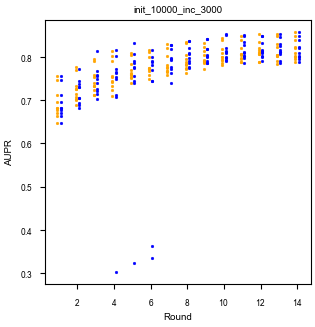

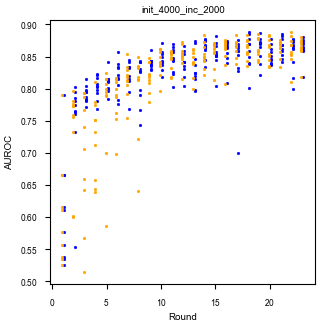

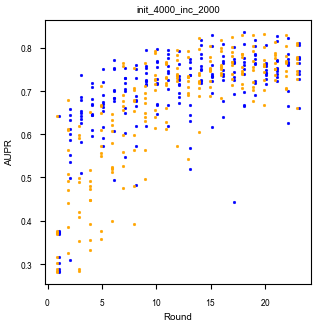

In [15]:
for expt, df in performance_dict.items():
    df = df[df["Mode"] != "Full"]
    expt_splitter = expt.split("_")
    batch_size = int(expt_splitter[3])

    for metric in ["AUROC", "AUPR"]:
        fig, ax = plt.subplots(figsize=plot_utils.get_figsize(frac=0.5, aspect=1))
        offset = 0.09
        for mode, data in df.groupby("Mode"):
            # x = data["n_train"]
            x = data["Round"].str[5:].astype(int)
            y = data[metric]
            c = colors[mode]

            if mode == "Entropy":
                x += offset
            elif mode == "Random":
                x -= offset
            else:
                raise ValueError(f"Mode should only be Entropy or Random, saw {mode}")

            ax.scatter(x, y, label=mode, color=c)
        ax.set_xlabel("Round")
        ax.set_ylabel(metric)
        ax.set_title(expt)